### O Notebook Python abaixo foi utilizado durante o desafio CIVITAS, de 28/06/2024 - 01/07/2024. Este artefato tem valor de rascunho. Não possui comentários e células foram apagadas e sobrescritas durante o processo.

# Example 1: Query a table with SQL and magic commands

In [1]:
%%bigquery results --project airy-runway-427916-h5
SELECT
  TO_HEX(placa) AS placa_hex,
  TO_HEX(empresa) AS empresa_hex,
  TO_HEX(tipoveiculo) AS tipoveiculo_hex,
  velocidade,
  TO_HEX(camera_numero) AS cameranumero_hex,
  camera_latitude,
  camera_longitude,
  datahora,
  datahora_captura
FROM `rj-cetrio.desafio.readings_2024_06`
WHERE camera_latitude < -22.8
  AND camera_latitude > -23.0
  AND camera_longitude > -43.8
  AND camera_longitude < -43.1

Query is running:   0%|          |

Downloading:   0%|          |

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame(results)
df.head(6)
# df.to_csv()

,placa_hex,empresa_hex,tipoveiculo_hex,velocidade,cameranumero_hex,camera_latitude,camera_longitude,datahora,datahora_captura
0,27086f01c70efad3f31aec9b96c3156e9e,1e2545af9d48c6,e2e0029fc0d3e5,64,5fba956e453d45,-22.825619,-43.336350,2024-06-11 19:04:09+00:00,2024-06-11 19:05:00+00:00
1,e5ad02fcd5443cde4d6fdf727d0b8fc576,1e2545af9d48c6,e2e0029fc0d3e5,1,61f9e30dcfe342,-22.905833,-43.275000,2024-06-10 09:25:15+00:00,2024-06-10 09:26:01+00:00
2,c4f2ccdfad9abdebf29312256c4632fdc1,1e2545af9d48c6,e2e0029fc0d3e5,63,d3516f112de0ee,-22.918333,-43.249167,2024-06-08 07:28:08+00:00,2024-06-08 07:29:00+00:00
3,bd47298a7eb80b48334d4f6cb17a1ac2e7,1e2545af9d48c6,e2e0029fc0d3e5,73,d8cb23594079f8,-22.887337,-43.224028,2024-06-11 11:24:24+00:00,2024-06-11 11:25:01+00:00
4,fd13cb1f8102ca1d80df65fb887d8eb6ba,1e2545af9d48c6,e2e0029fc0d3e5,65,e16686bf867ffa,-22.817610,-43.307088,2024-06-12 22:56:57+00:00,2024-06-12 22:58:01+00:00
5,1227fb270fbec46ba6140edd9955d27d74,1e2545af9d48c6,e2e0029fc0d3e5,63,e3d5802ea05d80,-22.862674,-43.247899,2024-06-12 02:58:53+00:00,2024-06-12 02:59:00+00:00


In [4]:
print(df.shape)
df.describe()

(29949144, 9)


,velocidade,camera_latitude,camera_longitude
count,29949144.0,2.994914e+07,2.994914e+07
mean,36.785385,-2.291526e+01,-4.333425e+01
std,14.838939,4.780228e-02,1.225577e-01
min,0.0,-2.299998e+01,-4.369023e+01
25%,28.0,-2.295918e+01,-4.339087e+01
50%,36.0,-2.291581e+01,-4.332562e+01
75%,45.0,-2.288232e+01,-4.323359e+01
max,255.0,-2.280303e+01,-4.317139e+01


In [5]:
df_sorted = df.sort_values(by="datahora")

In [6]:
dfSmall = df_sorted.head(1000)

In [7]:
%%bigquery cameraCountEmpresa --project airy-runway-427916-h5
SELECT TO_HEX(empresa) as empresa_hex, COUNT(DISTINCT camera_numero) AS camera_count
FROM `rj-cetrio.desafio.readings_2024_06`
GROUP BY empresa
ORDER BY camera_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

<Figure size 1000x600 with 0 Axes>

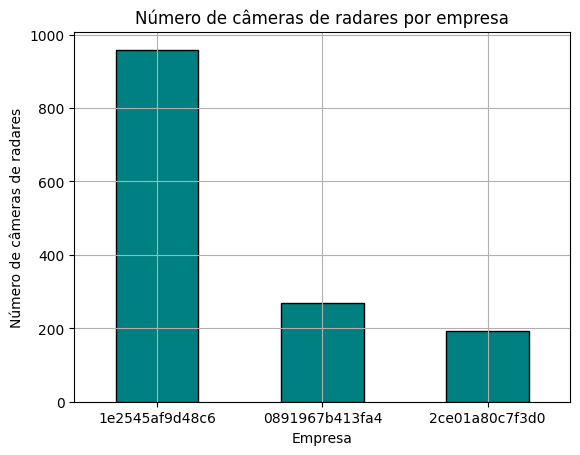

In [8]:
plt.figure(figsize=(10, 6))
cameraCountEmpresa.plot(kind='bar', x='empresa_hex', y='camera_count', legend=False, color='teal', edgecolor='black')
plt.xlabel('Empresa')
plt.ylabel('Número de câmeras de radares')
plt.title('Número de câmeras de radares por empresa')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [9]:
%%bigquery cameraCountEmpresaWeighted --project airy-runway-427916-h5
SELECT empresa_hex, SUM(entry_count) AS total_entries
FROM (
  SELECT camera_numero, TO_HEX(empresa) as empresa_hex, COUNT(*) AS entry_count
  FROM `rj-cetrio.desafio.readings_2024_06`
  GROUP BY camera_numero, empresa_hex
) AS camera_entries
GROUP BY empresa_hex
ORDER BY total_entries DESC;

Query is running:   0%|          |

Downloading:   0%|          |

<Figure size 1000x600 with 0 Axes>

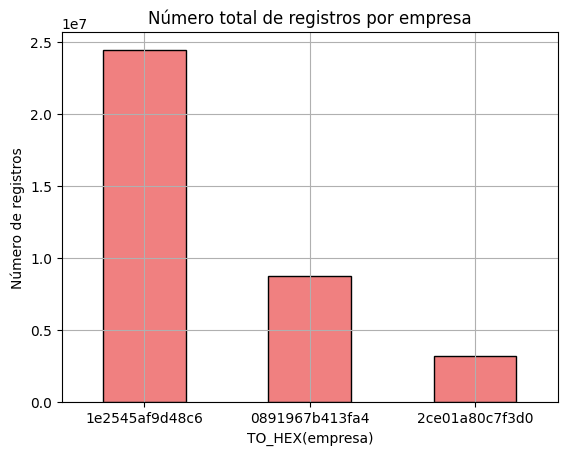

In [10]:
plt.figure(figsize=(10, 6))
cameraCountEmpresaWeighted.plot(kind='bar', x='empresa_hex', y='total_entries', legend=False, color='lightcoral', edgecolor='black')
plt.xlabel('TO_HEX(empresa)')
plt.ylabel('Número de registros')
plt.title('Número total de registros por empresa')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [11]:
cameraCountEmpresaWeighted

,empresa_hex,total_entries
0,1e2545af9d48c6,24474488
1,0891967b413fa4,8717449
2,2ce01a80c7f3d0,3166599


In [12]:
%%bigquery avgSpeedVeiculo --project airy-runway-427916-h5
SELECT
  TO_HEX(tipoveiculo) as tipoveiculo_hex,
  AVG(velocidade) AS avg_velocidade
FROM `rj-cetrio.desafio.readings_2024_06`
GROUP BY tipoveiculo
ORDER BY avg_velocidade DESC;

Query is running:   0%|          |

Downloading:   0%|          |

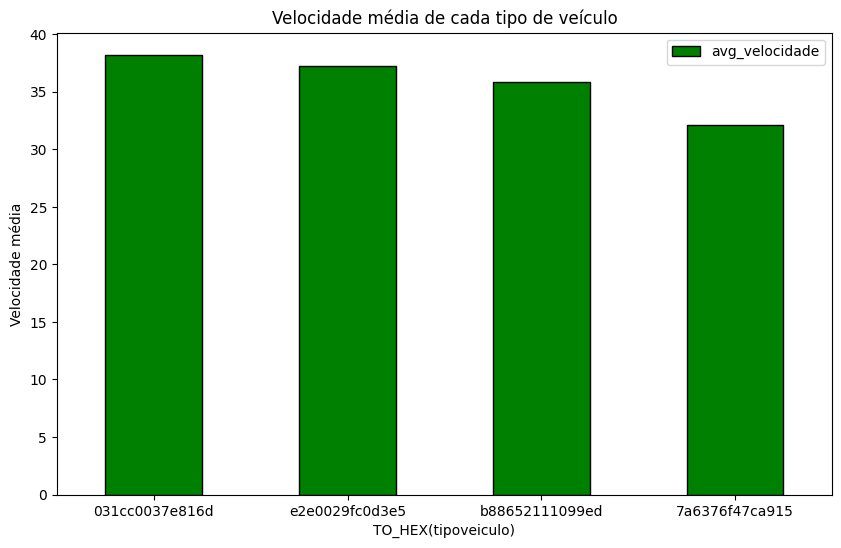

In [13]:
avgSpeedVeiculo.plot(kind='bar', x='tipoveiculo_hex', figsize=(10, 6), color="green", edgecolor='black')

plt.xlabel('TO_HEX(tipoveiculo)')
plt.ylabel('Velocidade média')
plt.title('Velocidade média de cada tipo de veículo')
plt.xticks(rotation=0)
plt.show()

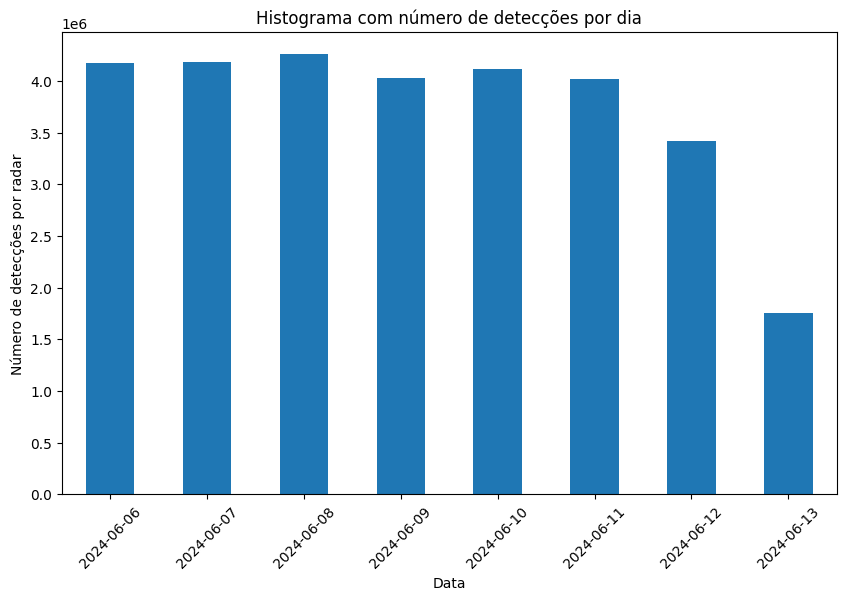

In [14]:
df['datahora'] = pd.to_datetime(df['datahora'])

df['date'] = df['datahora'].dt.date

df['date'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Data')
plt.ylabel('Número de detecções por radar')
plt.title('Histograma com número de detecções por dia')
plt.xticks(rotation=45)
plt.show()

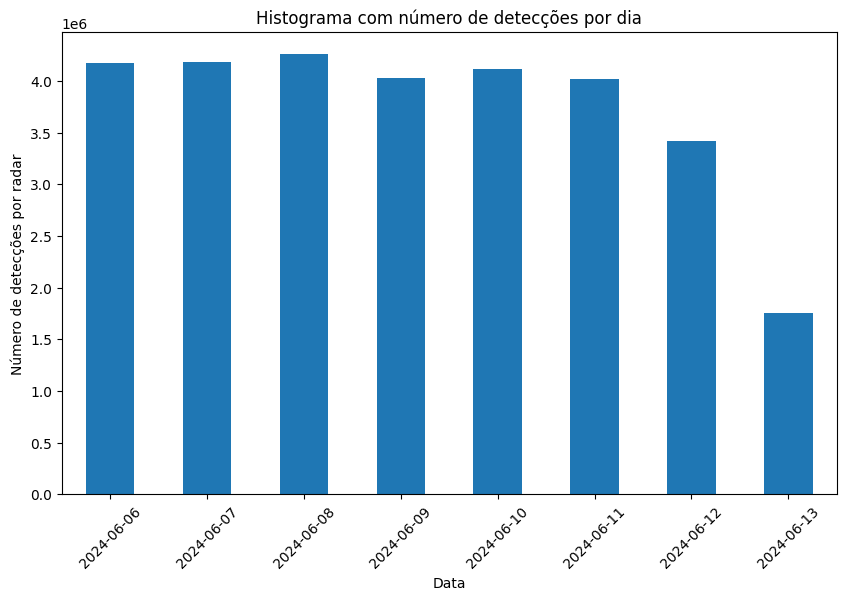

In [16]:
# df['date'] = df['datahora'].dt.date

# df['date'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))

# plt.xlabel('Data')
# plt.ylabel('Número de detecções por radar')
# plt.title('Histograma com número de detecções por dia')
# plt.xticks(rotation=45)
# plt.show()

In [17]:
def remove_outliers(df, column, lowerQT, higherQT):
    Q1 = df[column].quantile(lowerQT)
    Q3 = df[column].quantile(higherQT)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

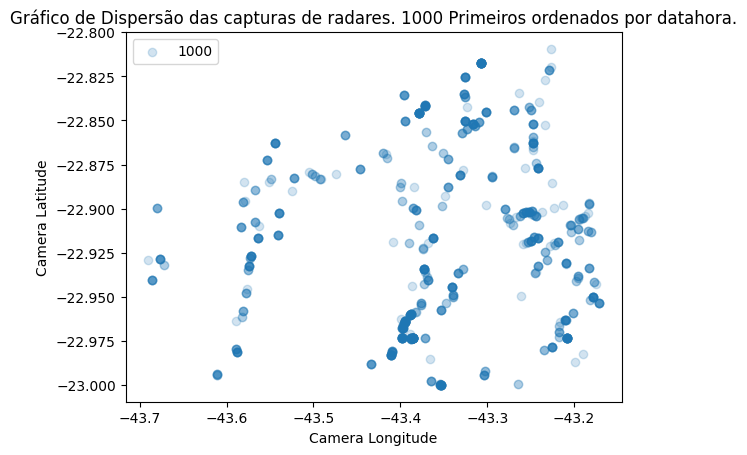

In [18]:
dfSmall1000 = df_sorted.head(1000)

plt.scatter(x=dfSmall1000['camera_longitude'], y=dfSmall1000['camera_latitude'], label='1000', alpha=0.2)
plt.xlabel('Camera Longitude')
plt.ylabel('Camera Latitude')
plt.title('Gráfico de Dispersão das capturas de radares. 1000 Primeiros ordenados por datahora.')
plt.legend()
plt.show()

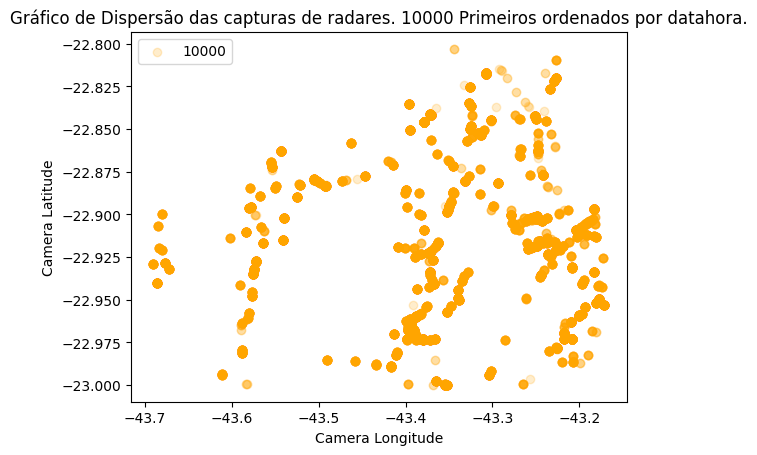

In [20]:
dfSmall10000 = df_sorted.head(10000)

plt.scatter(x=dfSmall10000['camera_longitude'], y=dfSmall10000['camera_latitude'], label='10000', alpha=0.2, color='orange')
plt.xlabel('Camera Longitude')
plt.ylabel('Camera Latitude')
plt.title('Gráfico de Dispersão das capturas de radares. 10000 Primeiros ordenados por datahora.')
plt.legend()
plt.show()

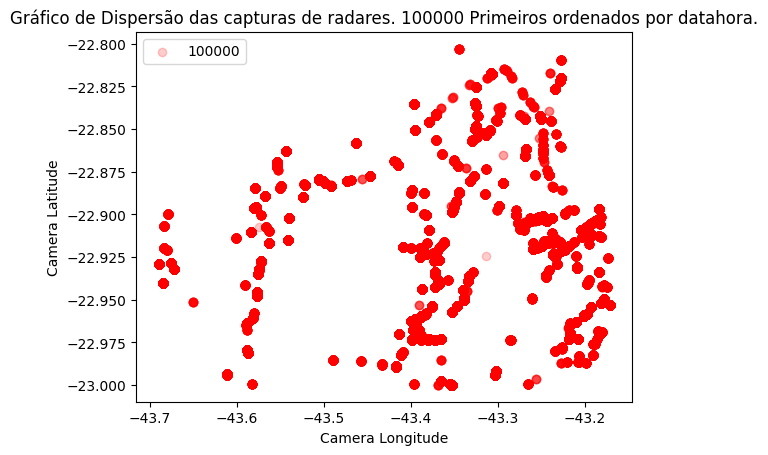

In [21]:
dfSmall100000 = df_sorted.head(100000)

plt.scatter(x=dfSmall100000['camera_longitude'], y=dfSmall100000['camera_latitude'], label='100000', alpha=0.2, color='red')
plt.xlabel('Camera Longitude')
plt.ylabel('Camera Latitude')
plt.title('Gráfico de Dispersão das capturas de radares. 100000 Primeiros ordenados por datahora.')
plt.legend()
plt.show()

In [41]:
import plotly.express as px
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(dfSmall1000,
                        lat="camera_latitude",
                        lon="camera_longitude",
                        color="datahora",
                        color_continuous_scale=color_scale,
                        zoom=8,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [42]:
# df500000 = df_sorted.head(1000000)
entry_counts = df_sorted.groupby('cameranumero_hex').size().reset_index(name='entry_count')

avg_velocity = df_sorted[df_sorted['velocidade'] != 0].groupby('cameranumero_hex')['velocidade'].mean().reset_index(name='avg_velocity')

df_summary = df_sorted[['cameranumero_hex', 'camera_latitude', 'camera_longitude']].drop_duplicates()
df_summary = df_summary.merge(entry_counts, on='cameranumero_hex')
df_summary = df_summary.merge(avg_velocity, on='cameranumero_hex')

fig_entries = px.density_mapbox(df_summary,
                                lat='camera_latitude',
                                lon='camera_longitude',
                                z='entry_count',
                                radius=10,
                                center=dict(lat=df['camera_latitude'].mean(), lon=df['camera_longitude'].mean()),
                                zoom=8,
                                mapbox_style='carto-positron',
                                color_continuous_scale='Viridis',
                                height=800,
                                width=1200)

fig_entries.update_layout(title="Mapa de Calor do número de registros por câmera de radar")

fig_velocity = px.density_mapbox(df_summary,
                                 lat='camera_latitude',
                                 lon='camera_longitude',
                                 z='avg_velocity',
                                 radius=10,
                                 center=dict(lat=df['camera_latitude'].mean(), lon=df['camera_longitude'].mean()),
                                 zoom=8,
                                 mapbox_style='carto-positron',
                                 color_continuous_scale='Plasma',
                                 height=800,
                                 width=1200)

fig_velocity.update_layout(title="Mapa de Calor das velocidades médias por câmera de radar")

fig_entries.show()
fig_velocity.show()

In [ ]:
dfSmall100000.to_csv("dfSmall100000.csv", index=False)
dfSmall10000.to_csv("dfSmall10000.csv", index=False)
dfSmall1000.to_csv("dfSmall1000.csv", index=False)

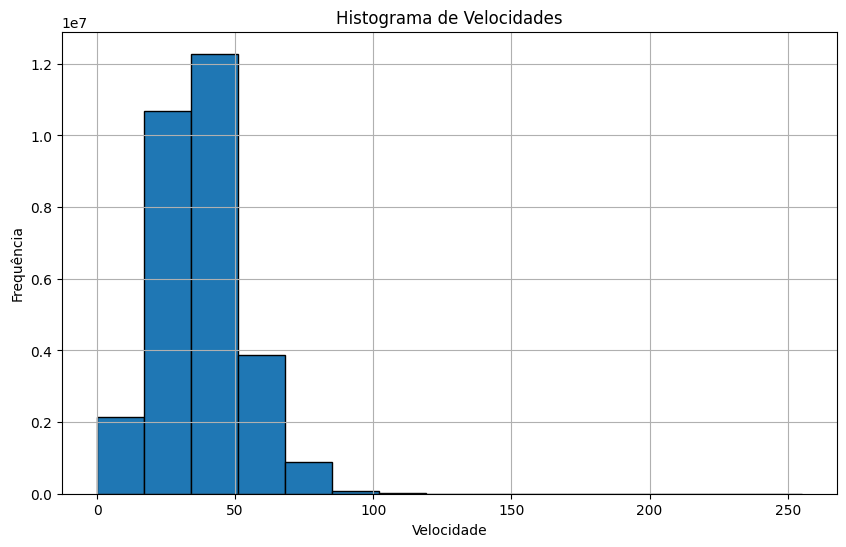

In [ ]:
plt.figure(figsize=(10, 6))
df['velocidade'].plot(kind='hist', bins=15, edgecolor='black')

plt.xlabel('Velocidade')
plt.ylabel('Frequência')
plt.title('Histograma de Velocidades')
plt.grid(True)
plt.show()

In [ ]:
%%bigquery cameraNumFreq --project airy-runway-427916-h5
SELECT TO_HEX(camera_numero) as camera_numero_hex, COUNT(*) AS entry_count
FROM `rj-cetrio.desafio.readings_2024_06`
GROUP BY camera_numero
ORDER BY entry_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
cameraNumFreq

,camera_numero_hex,entry_count
0,f6b6eff6c3c578,242301
1,48e548dff5a44f,127557
2,17fb8f31a11844,126151
3,a6f22a3bf865b6,124780
4,3c2f2d33b1e141,121282
...,...,...
1416,009996cd04468c,3
1417,ae5e92b5fa024c,2
1418,bb059f56ccf5e3,1
1419,457ee59cde6d92,1


<Figure size 1000x600 with 0 Axes>

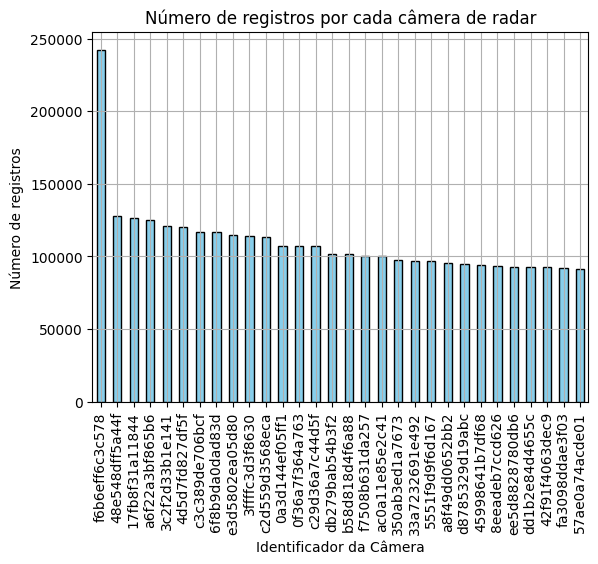

In [ ]:
plt.figure(figsize=(10, 6))
cameraNumFreq[0:30].plot(kind='bar', x='camera_numero_hex', y='entry_count', legend=False, color='skyblue', edgecolor='black')
plt.xlabel('Identificador da Câmera')
plt.ylabel('Número de registros')
plt.title('Número de registros por cada câmera de radar')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

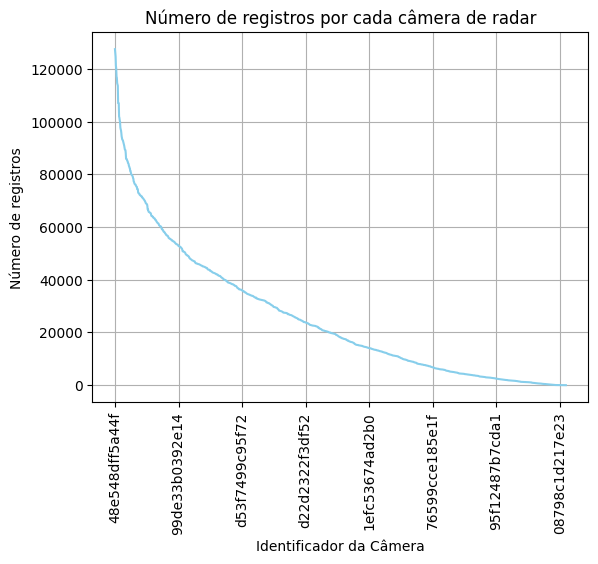

In [ ]:
plt.figure(figsize=(10, 6))
cameraNumFreq[1:].plot(kind='line', x='camera_numero_hex', y='entry_count', legend=False, color='skyblue')
plt.xlabel('Identificador da Câmera')
plt.ylabel('Número de registros')
plt.title('Número de registros por cada câmera de radar')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

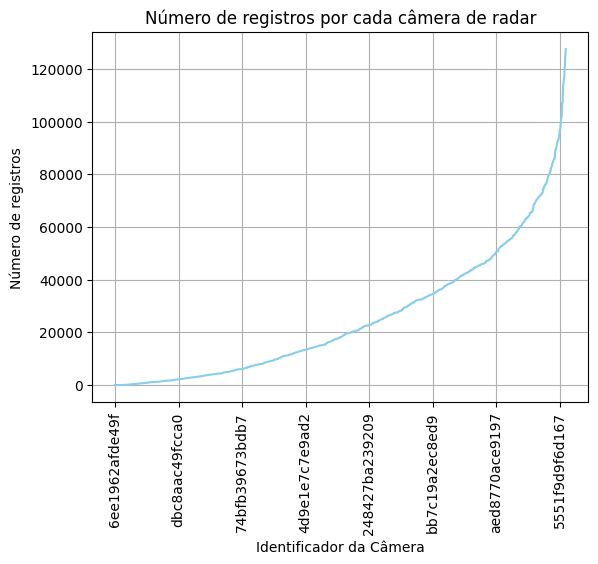

In [ ]:
reversedCameraNumFreq = cameraNumFreq[1:].reindex(index=cameraNumFreq[1:].index[::-1])
plt.figure(figsize=(10, 6))
reversedCameraNumFreq.plot(kind='line', x='camera_numero_hex', y='entry_count', legend=False, color='skyblue')
plt.xlabel('Identificador da Câmera')
plt.ylabel('Número de registros')
plt.title('Número de registros por cada câmera de radar')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
cameraNumFreq

,camera_numero_hex,entry_count
0,f6b6eff6c3c578,242301
1,48e548dff5a44f,127557
2,17fb8f31a11844,126151
3,a6f22a3bf865b6,124780
4,3c2f2d33b1e141,121282
...,...,...
1416,009996cd04468c,3
1417,ae5e92b5fa024c,2
1418,bb059f56ccf5e3,1
1419,457ee59cde6d92,1
